# PyGeM
## Tutorial 4: Inverse Distance Weighting interpolation technique on a cube

In this tutorial we will show how to use the Inverse Distance Weighting interpolation technique to deform a cube.

First of all, we import the required classes, the numpy package and we set matplotlib for the notebook.

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

from pygem.params_idw import IDWParameters
from pygem.idw import IDW

We need to read a parameters file.

In [2]:
parameters_file = 'tests/test_datasets/parameters_idw_cube.prm'

params = IDWParameters()
params.read_parameters(filename=parameters_file)

The following is the parameters file for this particular case. The Inverse Distance Weighting section describes the power parameter (see the documentation of the IDW class for more details). As control points we consider the 8 vertices of the cube (the first one is not exactly the vertex), and we move 3 of them. In the Control points section there are all the coordinates of the control points.

In [3]:
 %cat 'tests/test_datasets/parameters_idw_cube.prm'


[Inverse Distance Weighting]
# This section describes the setting of idw.

# the power parameter
power: 2


[Control points]
# This section describes the RBF control points.

# original control points collects the coordinates of the interpolation control
# points before the deformation.
original control points: -.1   0.0   0.0
                         0.0   0.0   1.0
                         0.0   1.0   0.0
                         1.0   0.0   0.0
                         0.0   1     1.0
                         1.0   0.0   1.0
                         1.0   1.0   0
                         1.0   1.0   1.0

# deformed control points collects the coordinates of the interpolation control
# points after the deformation.
deformed control points: 0.1   0.2   .3
                         0.0   0.0   1.0
                         0.0   1.0   0.0
                         1.0   0.0   0.0
                         0.0   .8   1.0
                         1.0   0.0   1.0
                         1.0

Here we create a 10-by-10-by-10 lattice to mimic a cube.

In [4]:
nx, ny, nz = (10, 10, 10)
mesh = np.zeros((nx * ny * nz, 3))

xv = np.linspace(0, 1, nx)
yv = np.linspace(0, 1, ny)
zv = np.linspace(0, 1, nz)
z, y, x = np.meshgrid(zv, yv, xv)

mesh = np.array([x.ravel(), y.ravel(), z.ravel()])
mesh = mesh.T

Now we plot the points to see what we are doing.

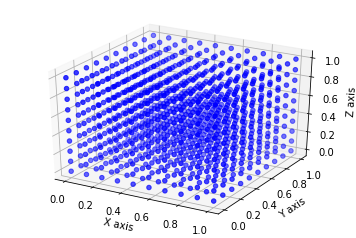

In [5]:
fig = plt.figure(1)
ax = fig.add_subplot(111, projection='3d')
ax.scatter(mesh[:, 0], mesh[:, 1], mesh[:, 2], c='blue', marker='o')
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')
plt.show()

Finally we perform the IDW interpolation using the IDW class.

In [6]:
idw = IDW(params, mesh)
idw.perform()
new_mesh_points = idw.modified_mesh_points

We can plot the new points in order to see the deformation. Try different powers to better fit your specific problem.

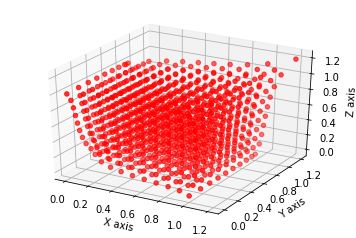

In [7]:
fig = plt.figure(2)
ax = fig.add_subplot(111, projection='3d')
ax.scatter(new_mesh_points[:, 0], new_mesh_points[:, 1], new_mesh_points[:, 2], c='red', marker='o')
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')
plt.show()